In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime
from unidecode import unidecode
import geopandas as gpd
from shapely import wkt
from scipy import stats
import os

In [2]:
df=gpd.read_parquet(r"C:\Users\Andres\Downloads\captaciones_final.parquet")

In [3]:
df=df.drop_duplicates(subset="IDCAPTACION")

In [4]:
df.columns

Index(['POZO_ASIGNADO_AL_PUNTO', 'DISTANCIA_M_AL_POZO_ASIGNADO', 'IDUSUARIO',
       'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO_PUNTO_CAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO',
       'CAUDAL_ASIGNADO', 'TIPOUSO', 'DESCRIPCION_ACCESO', 'NOMBREFUENTE',
       'TIPOFUENTECAPTACION', 'SUBZONA', 'CONTINUIDAD', 'GRADOS_LAT',
       'MINUTOS_LAT', 'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG',
       'SEGUNDOS_LONG', 'CODIGOCIUU', 'DESCRIPCIONCIUU', 'FECHA_INICIO',
       'FECHA_FIN', 'LAT_DD_calc', 'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE',
       'RATIO_CONCESIONADO_TOTAL', 'RATIO_CONCESIONADO_DISPONIBLE',
       'RATIO_ASIGNADO_CONCESIONADO', 'RIESGO_ASIG_DISP', 'REGION',
       'GEOMETRIA_PUNTO_CAPTACION', 'ID_POZO_MONITOREO',
       'MUNICIPIO_POZO_MONITOREO', 'CUENCA_HIDROGRAFICA', 'NORTE', 'ESTE',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'FECHA_MEDICION_

In [5]:
data_modelo=df[["IDCAPTACION","OFERTA_HIDRICA_TOTAL","CAUDAL_ASIGNADO","TIPOUSO", "ESTADO_CAPTACION","LAT_DD_calc","LONG_DD_calc","ESTRUCTURA_GEOLOGICA",
                "UNIDAD GEOLOGICA","VALOR_NIVEL_ESTATICO","PROFUNDIDAD_MEDIA_RECIENTE_M"]]

In [6]:
data_modelo

,IDCAPTACION,OFERTA_HIDRICA_TOTAL,CAUDAL_ASIGNADO,TIPOUSO,ESTADO_CAPTACION,LAT_DD_calc,LONG_DD_calc,ESTRUCTURA_GEOLOGICA,UNIDAD GEOLOGICA,VALOR_NIVEL_ESTATICO,PROFUNDIDAD_MEDIA_RECIENTE_M
0,7027901,0.011803,1.500,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,30.11,35.4600
19,7030913,0.003500,0.034,Doméstico,Regular,4.746667,-74.232500,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,55.87,75.8625
190,7031968,0.005940,2.700,Agricola,Regular,4.751389,-74.303056,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,NaN,141.4960
266,7031969,0.013500,2.320,Agricola,Bueno,4.749722,-74.344167,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,NaN,96.4460
437,7031974,0.000975,0.010,Doméstico,Bueno,4.749722,-74.201944,Planicie Bogotá-Funza-Mosquera,Depósitos cuaternarios,48.73,79.5100
...,...,...,...,...,...,...,...,...,...,...,...
67070,7038125,0.001700,0.050,Pecuario,Regular,4.780000,-74.167500,Sinclinal de Rio Frio,Grupo Guadalupe,NaN,NaN
67089,7038126,0.003000,0.015,Doméstico,Regular,4.835000,-74.288611,Sinclinal de Subachoque,Depósitos cuaternarios,NaN,26.5200
67165,7038127,0.005000,0.015,Doméstico,Malo,4.831667,-74.287778,Sinclinal de Subachoque,Depósitos cuaternarios,NaN,26.5200
67241,7038128,0.003000,2.900,Agricola,Malo,4.858056,-74.218889,Sinclinal de Subachoque,Formación Bogotá,NaN,69.1620


In [7]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              2
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA             66
UNIDAD GEOLOGICA                 66
VALOR_NIVEL_ESTATICO            734
PROFUNDIDAD_MEDIA_RECIENTE_M    180
dtype: int64

In [8]:
data_modelo[data_modelo.OFERTA_HIDRICA_TOTAL.isnull()]

,IDCAPTACION,OFERTA_HIDRICA_TOTAL,CAUDAL_ASIGNADO,TIPOUSO,ESTADO_CAPTACION,LAT_DD_calc,LONG_DD_calc,ESTRUCTURA_GEOLOGICA,UNIDAD GEOLOGICA,VALOR_NIVEL_ESTATICO,PROFUNDIDAD_MEDIA_RECIENTE_M
10708,7032880,NaN,0.02,Doméstico,Bueno,5.016111,-73.939444,None,None,NaN,NaN
61561,7037702,NaN,3.94,Otro,Bueno,4.963056,-73.955833,None,None,NaN,NaN


In [9]:
data_modelo = data_modelo.dropna(subset=["ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"])


In [10]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              0
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA              0
UNIDAD GEOLOGICA                  0
VALOR_NIVEL_ESTATICO            668
PROFUNDIDAD_MEDIA_RECIENTE_M    114
dtype: int64

In [11]:
data_modelo.columns

Index(['IDCAPTACION', 'OFERTA_HIDRICA_TOTAL', 'CAUDAL_ASIGNADO', 'TIPOUSO',
       'ESTADO_CAPTACION', 'LAT_DD_calc', 'LONG_DD_calc',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'PROFUNDIDAD_MEDIA_RECIENTE_M'],
      dtype='object')

In [12]:
data_modelo.loc[:, "PROFUNDIDAD_MEDIA_RECIENTE_M"] = np.where(
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].isna(),
    data_modelo["VALOR_NIVEL_ESTATICO"],
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"]
)



In [13]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              0
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA              0
UNIDAD GEOLOGICA                  0
VALOR_NIVEL_ESTATICO            668
PROFUNDIDAD_MEDIA_RECIENTE_M     68
dtype: int64

In [14]:
data_modelo.PROFUNDIDAD_MEDIA_RECIENTE_M.isnull().sum()

68

In [15]:
# Aseguramos que los nombres no tengan espacios ocultos
data_modelo.columns = data_modelo.columns.str.strip()

# 1️⃣ Imputar por UNIDAD_GEOLOGICA (media o mediana por unidad)
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("UNIDAD GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
    lambda x: x.fillna(x.median())
)

# 2️⃣ Imputar por ESTRUCTURA_GEOLOGICA si aún hay nulos
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("ESTRUCTURA_GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
    lambda x: x.fillna(x.median())
)

# 3️⃣ Imputar los pocos nulos restantes con la mediana global
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].fillna(
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].median(),
    inplace=True
)


C:\Users\Andres\AppData\Local\Temp\ipykernel_20228\1221829184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("UNIDAD GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
C:\Users\Andres\AppData\Local\Temp\ipykernel_20228\1221829184.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("ESTRUCTURA_GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
C:\Users\Andres\AppDa

In [16]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              0
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA              0
UNIDAD GEOLOGICA                  0
VALOR_NIVEL_ESTATICO            668
PROFUNDIDAD_MEDIA_RECIENTE_M      0
dtype: int64

In [17]:
data_modelo.drop(columns=["VALOR_NIVEL_ESTATICO"],inplace=True)

C:\Users\Andres\AppData\Local\Temp\ipykernel_20228\2752978811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modelo.drop(columns=["VALOR_NIVEL_ESTATICO"],inplace=True)


In [18]:
data_modelo.isnull().sum()

IDCAPTACION                     0
OFERTA_HIDRICA_TOTAL            0
CAUDAL_ASIGNADO                 0
TIPOUSO                         0
ESTADO_CAPTACION                0
LAT_DD_calc                     0
LONG_DD_calc                    0
ESTRUCTURA_GEOLOGICA            0
UNIDAD GEOLOGICA                0
PROFUNDIDAD_MEDIA_RECIENTE_M    0
dtype: int64

In [19]:
data_modelo_categorica=gpd.read_parquet(r"C:\Users\Andres\Downloads\captaciones_final.parquet")

In [20]:
data_modelo_categorica.columns

Index(['POZO_ASIGNADO_AL_PUNTO', 'DISTANCIA_M_AL_POZO_ASIGNADO', 'IDUSUARIO',
       'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO_PUNTO_CAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO',
       'CAUDAL_ASIGNADO', 'TIPOUSO', 'DESCRIPCION_ACCESO', 'NOMBREFUENTE',
       'TIPOFUENTECAPTACION', 'SUBZONA', 'CONTINUIDAD', 'GRADOS_LAT',
       'MINUTOS_LAT', 'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG',
       'SEGUNDOS_LONG', 'CODIGOCIUU', 'DESCRIPCIONCIUU', 'FECHA_INICIO',
       'FECHA_FIN', 'LAT_DD_calc', 'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE',
       'RATIO_CONCESIONADO_TOTAL', 'RATIO_CONCESIONADO_DISPONIBLE',
       'RATIO_ASIGNADO_CONCESIONADO', 'RIESGO_ASIG_DISP', 'REGION',
       'GEOMETRIA_PUNTO_CAPTACION', 'ID_POZO_MONITOREO',
       'MUNICIPIO_POZO_MONITOREO', 'CUENCA_HIDROGRAFICA', 'NORTE', 'ESTE',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'FECHA_MEDICION_

In [21]:
data_modelo_categorica=data_modelo_categorica[["IDCAPTACION","ESTADO_CAPTACION","TIPOUSO","ESTRUCTURA_GEOLOGICA","UNIDAD GEOLOGICA"]]

In [22]:
data_modelo_categorica.isnull().sum()

IDCAPTACION               0
ESTADO_CAPTACION          0
TIPOUSO                   0
ESTRUCTURA_GEOLOGICA    285
UNIDAD GEOLOGICA        285
dtype: int64

In [23]:
data_modelo_categorica = data_modelo_categorica.dropna(subset=["ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"])

In [24]:
# Identificar columnas únicas en cada dataset
cols_unicas_categoricas = [c for c in data_modelo_categorica.columns if c not in data_modelo.columns or c == "IDCAPTACION"]

# Unir solo las columnas necesarias
data_modelo_if = data_modelo.merge(data_modelo_categorica[cols_unicas_categoricas], on="IDCAPTACION", how="left")


In [25]:
data_modelo_if.shape

(67051, 10)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest

In [27]:
data_modelo_if.columns

Index(['IDCAPTACION', 'OFERTA_HIDRICA_TOTAL', 'CAUDAL_ASIGNADO', 'TIPOUSO',
       'ESTADO_CAPTACION', 'LAT_DD_calc', 'LONG_DD_calc',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA',
       'PROFUNDIDAD_MEDIA_RECIENTE_M'],
      dtype='object')

In [28]:
num_cols = ["OFERTA_HIDRICA_TOTAL","CAUDAL_ASIGNADO","LAT_DD_calc","LONG_DD_calc","PROFUNDIDAD_MEDIA_RECIENTE_M"]

cat_cols = ["TIPOUSO","ESTADO_CAPTACION","ESTRUCTURA_GEOLOGICA","UNIDAD GEOLOGICA"]

id_col = "IDCAPTACION"  


In [29]:
# 2. Preprocesamiento
# ===================================
# Numéricas: imputar medianas + escalar
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

# Categóricas: imputar valores faltantes + OneHotEncoder
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="MISSING")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combinar transformaciones
pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


In [30]:
# 3. Modelo Isolation Forest
# ===================================
iso_forest = IsolationForest(
    n_estimators=200,      # número de árboles
    contamination=0.05,    # % esperado de anomalías
    random_state=42,
    n_jobs=-1
)

In [31]:
# 4. Pipeline completo
# ===================================
pipe = Pipeline([
    ("pre", pre),
    ("iso", iso_forest)
])

In [32]:
# 5. Entrenar modelo
# ===================================
modeloIF=pipe.fit(data_modelo_if)

In [33]:
# 6. Predicciones
# ===================================
# -1 = anomalía, 1 = normal
labels = pipe["iso"].predict(pipe["pre"].transform(data_modelo_if))

In [34]:
# Scores (cuanto más negativo = más anómalo)
scores = pipe["iso"].decision_function(pipe["pre"].transform(data_modelo_if))

In [35]:
preds = pipe["iso"].predict(pipe["pre"].transform(data_modelo_if))
scores = pipe["iso"].decision_function(pipe["pre"].transform(data_modelo_if))

resultados = pd.DataFrame({
    "IDCAPTACION": data_modelo_if[id_col].values,
    "anomalia": preds,   # -1 = anómalo, 1 = normal
    "score": scores
})



In [36]:
resultados.anomalia.value_counts()

anomalia
 1    63707
-1     3344
Name: count, dtype: int64

In [37]:
resultados.columns

Index(['IDCAPTACION', 'anomalia', 'score'], dtype='object')

In [38]:
data_vis = df.copy()
data_vis = data_vis.merge(resultados, on="IDCAPTACION")


In [39]:
data_vis.columns

Index(['POZO_ASIGNADO_AL_PUNTO', 'DISTANCIA_M_AL_POZO_ASIGNADO', 'IDUSUARIO',
       'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO_PUNTO_CAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO',
       'CAUDAL_ASIGNADO', 'TIPOUSO', 'DESCRIPCION_ACCESO', 'NOMBREFUENTE',
       'TIPOFUENTECAPTACION', 'SUBZONA', 'CONTINUIDAD', 'GRADOS_LAT',
       'MINUTOS_LAT', 'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG',
       'SEGUNDOS_LONG', 'CODIGOCIUU', 'DESCRIPCIONCIUU', 'FECHA_INICIO',
       'FECHA_FIN', 'LAT_DD_calc', 'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE',
       'RATIO_CONCESIONADO_TOTAL', 'RATIO_CONCESIONADO_DISPONIBLE',
       'RATIO_ASIGNADO_CONCESIONADO', 'RIESGO_ASIG_DISP', 'REGION',
       'GEOMETRIA_PUNTO_CAPTACION', 'ID_POZO_MONITOREO',
       'MUNICIPIO_POZO_MONITOREO', 'CUENCA_HIDROGRAFICA', 'NORTE', 'ESTE',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'FECHA_MEDICION_

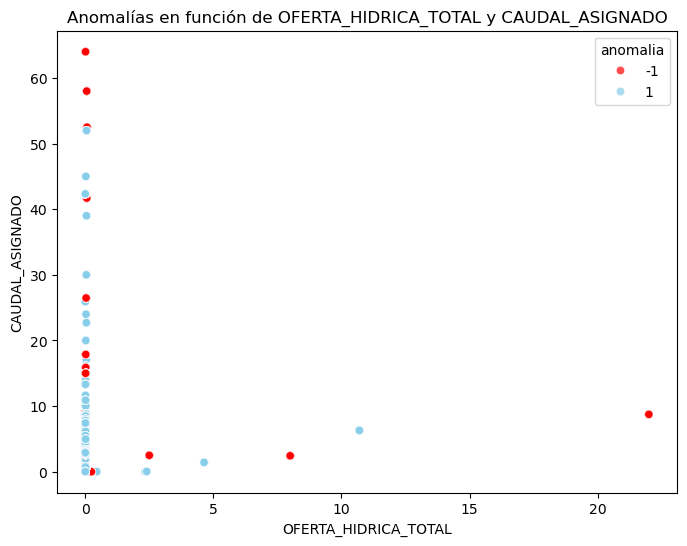

In [40]:


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data_vis,
    x="OFERTA_HIDRICA_TOTAL",
    y="CAUDAL_ASIGNADO",
    hue="anomalia",
    palette={1:"skyblue", -1:"red"},
    alpha=0.7
)
plt.title("Anomalías en función de OFERTA_HIDRICA_TOTAL y CAUDAL_ASIGNADO")
plt.show()


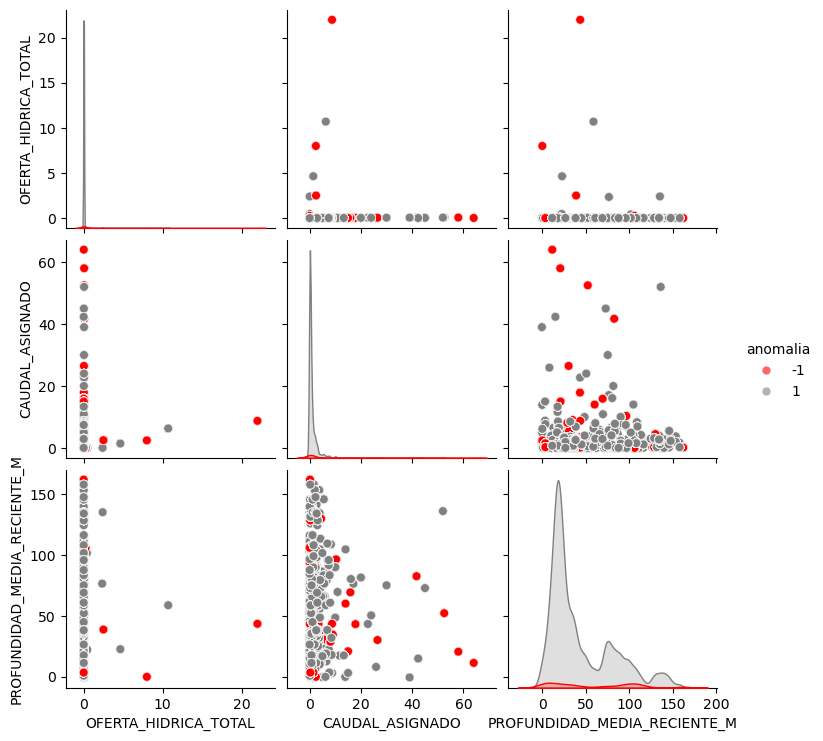

In [41]:
sns.pairplot(
    data_vis,
    vars=["OFERTA_HIDRICA_TOTAL","CAUDAL_ASIGNADO","PROFUNDIDAD_MEDIA_RECIENTE_M"],
    hue="anomalia",
    palette={1:"gray", -1:"red"},
    plot_kws={"alpha":0.6, "s":40}
)


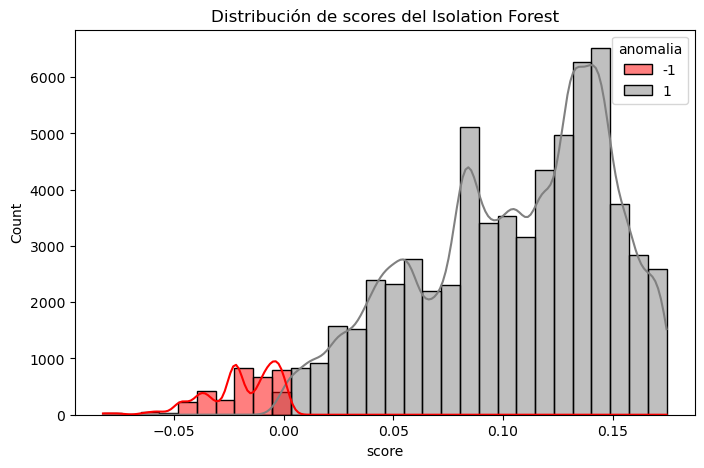

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data_vis, x="score", hue="anomalia", bins=30, kde=True, palette={1:"gray", -1:"red"})
plt.title("Distribución de scores del Isolation Forest")
plt.show()


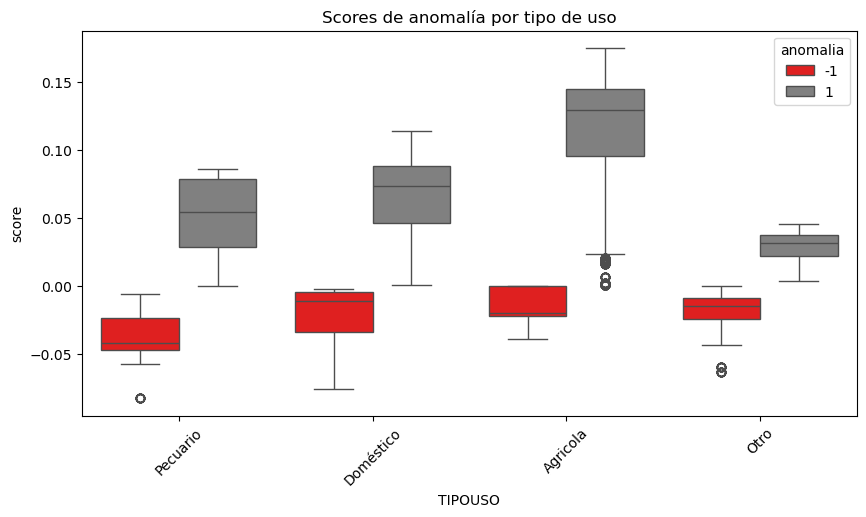

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=data_vis,
    x="TIPOUSO",
    y="score",
    hue="anomalia",
    palette={1:"gray", -1:"red"}
)
plt.title("Scores de anomalía por tipo de uso")
plt.xticks(rotation=45)
plt.show()


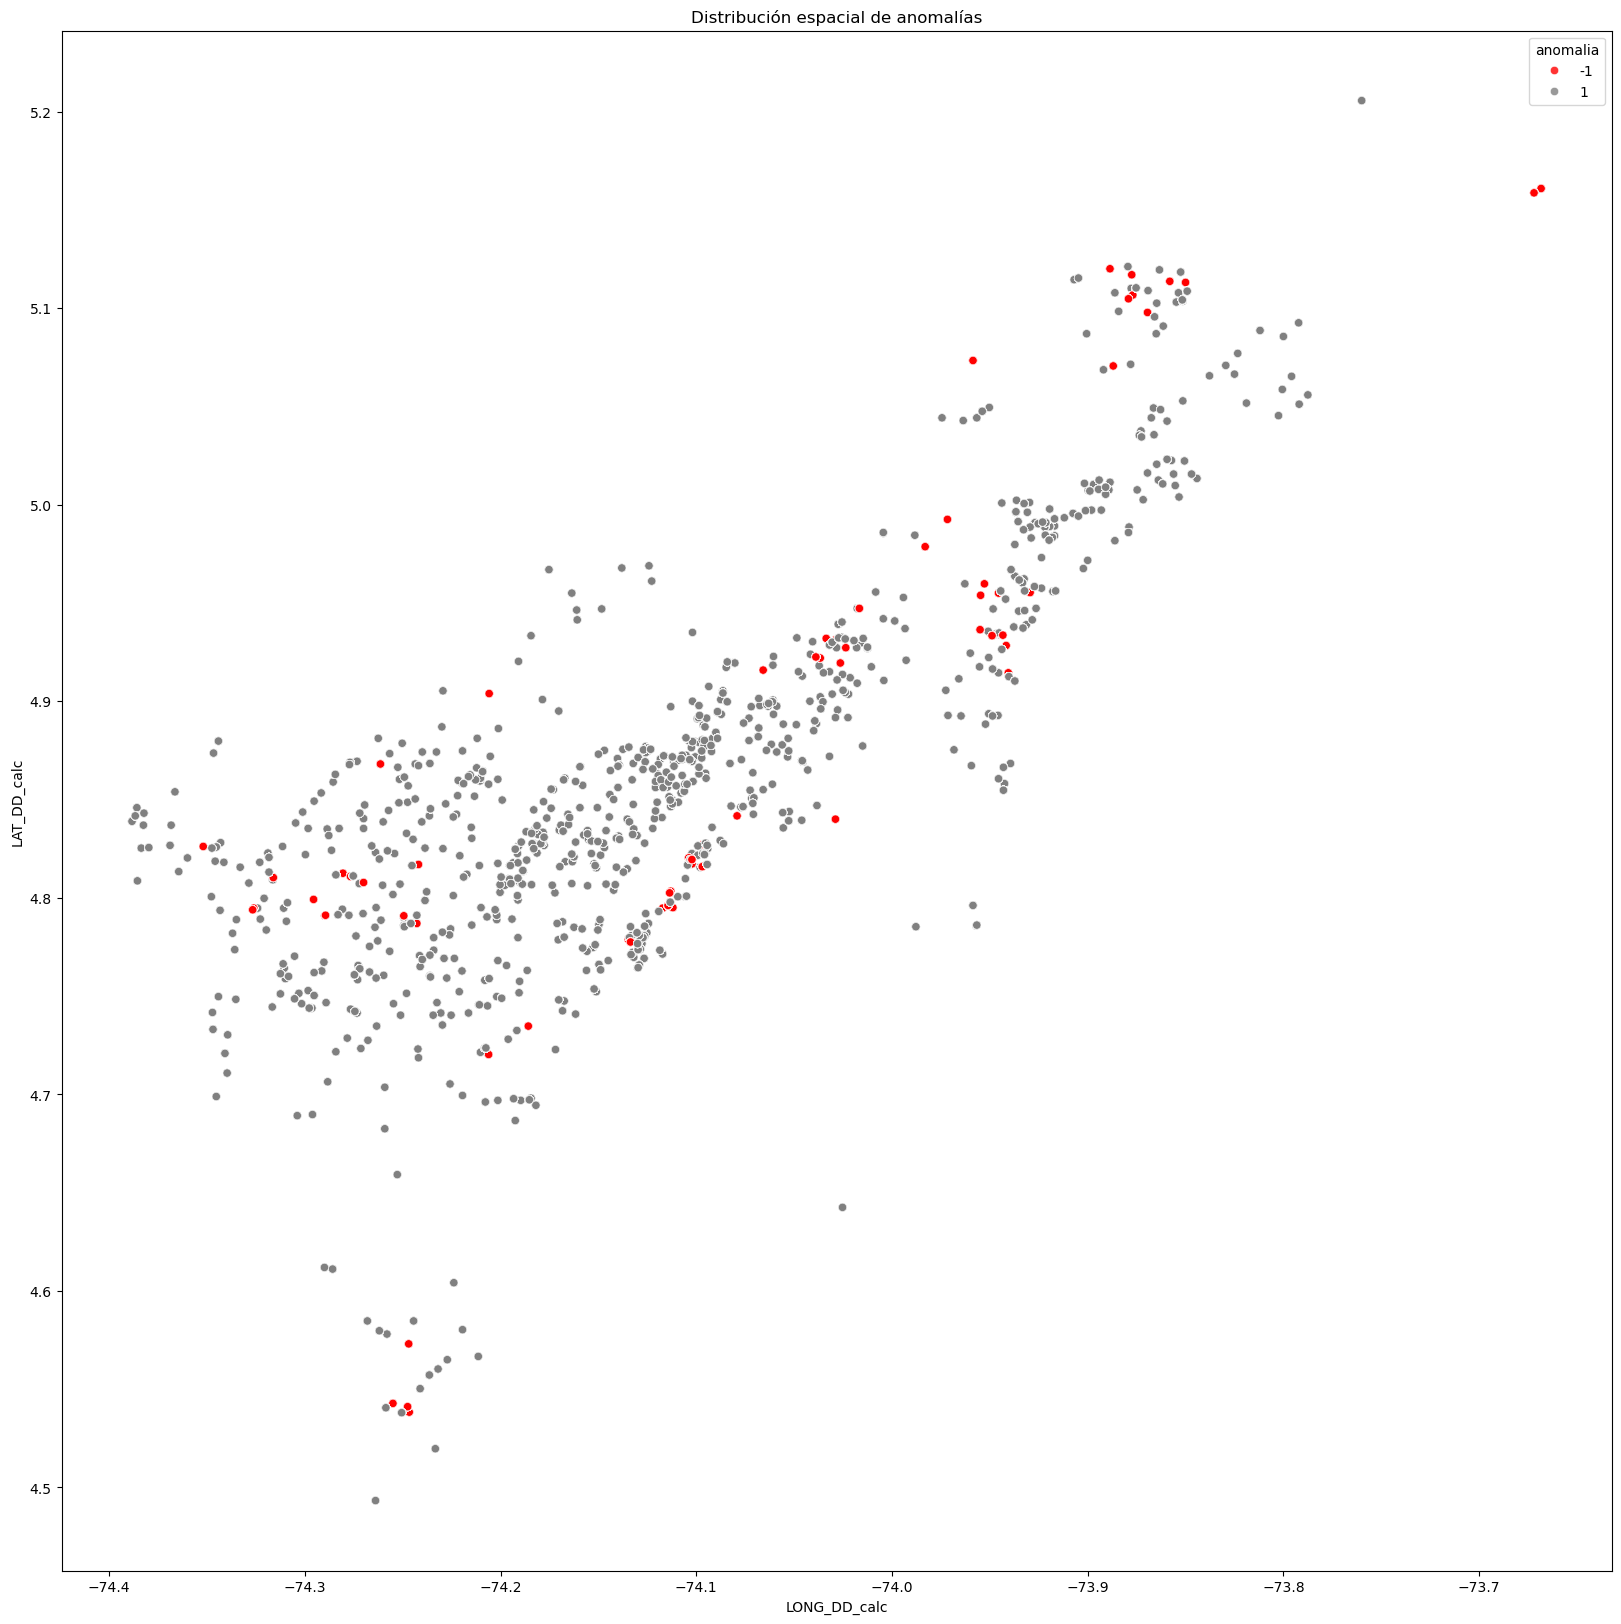

In [44]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    data=data_vis,
    x="LONG_DD_calc",
    y="LAT_DD_calc",
    hue="anomalia",
    palette={1:"gray", -1:"red"},
    alpha=0.8
)
plt.title("Distribución espacial de anomalías")
plt.show()


In [45]:
Municipios_sabana = [
    "SOACHA", "SIBATE", "BOJACA", "MOSQUERA", "MADRID", "FACATATIVA", "FUNZA", "TENJO", "TABIO",
    "COTA", "SUBACHOQUE", "EL_ROSAL", "CAJICA", "CHIA", "ZIPAQUIRA", "NEMOCON", "COGUA", "LA_CALERA",
    "SOPO", "TOCANCIPA", "GACHANCIPA", "SESQUILE", "GUATAVITA", "CHOCONTA", "SUESCA", "VILLAPINZON"
]

In [46]:
cundinamarca=gpd.read_file(r"C:\Users\Andres\Downloads\Municipios_de_Cundinamarca_2022\Municipios_de_Cundinamarca_2022.shp")

In [47]:
cundinamarca.drop(columns=['OBJECTID','MpCodigo','MpArea', 'MpNorma', 'MpCategor','MpAltitud', 'Restriccio', 'Depto', 'Ley617'],inplace=True)

In [48]:
cundinamarca.rename(columns={"MpNombre":"MUNICIPIO"},inplace=True)

In [49]:
from unidecode import unidecode

cundinamarca["MUNICIPIO"] = (
    cundinamarca["MUNICIPIO"]
    .fillna("")
    .astype(str)
    .map(unidecode)         # quita tildes
    .str.upper()            # convierte a mayúsculas
    .str.replace(" ", "_")  # reemplaza espacios por _
)


In [50]:
sabana_bogota=cundinamarca[cundinamarca["MUNICIPIO"].isin(Municipios_sabana)]

In [51]:
from shapely.geometry import Point

data_vis_geo = gpd.GeoDataFrame(
    data_vis,
    geometry=gpd.points_from_xy(data_vis["LONG_DD_calc"], data_vis["LAT_DD_calc"]),
    crs="EPSG:4326"
)


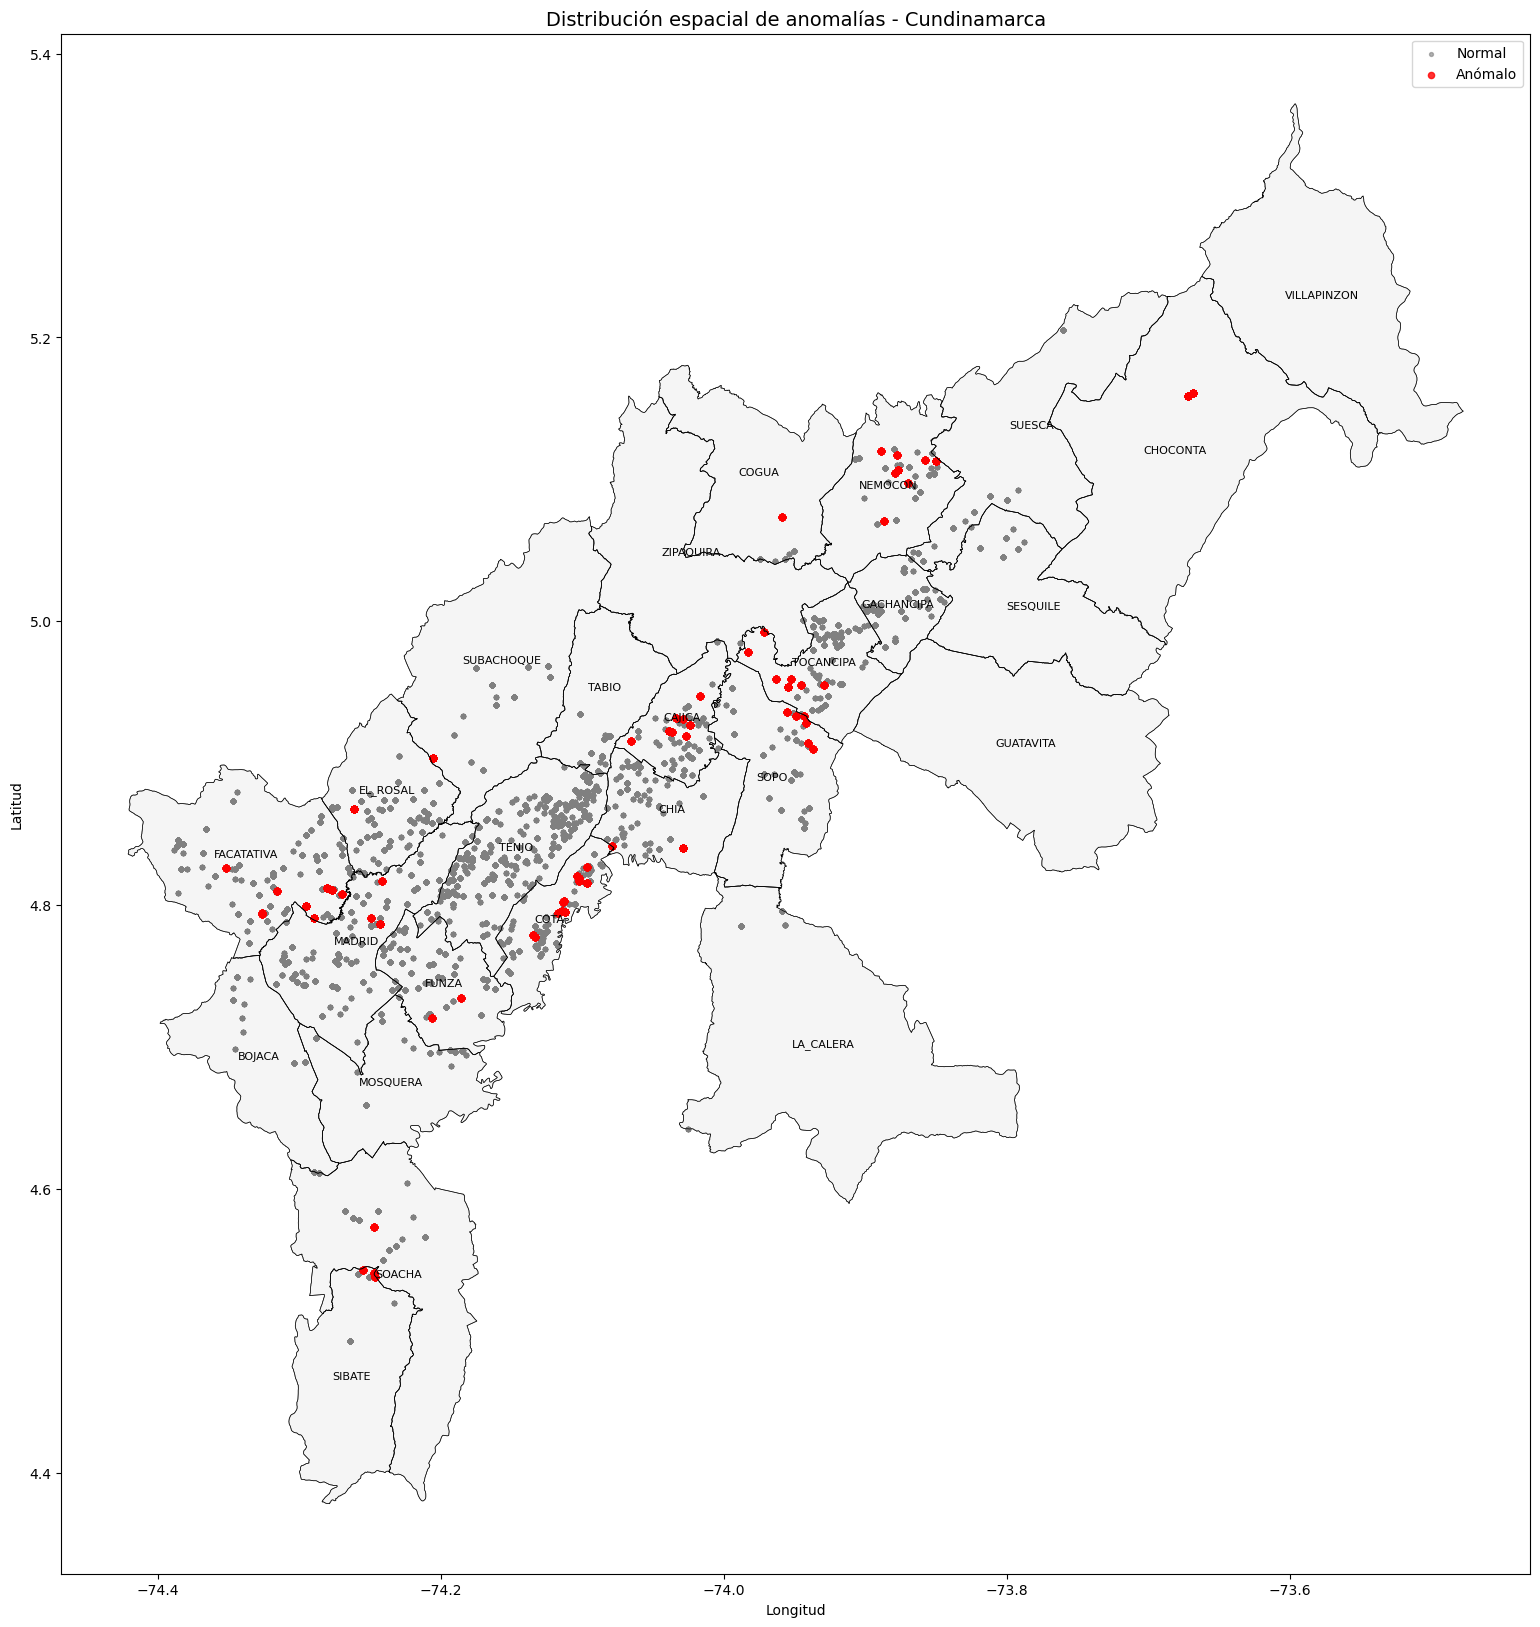

In [52]:

fig, ax = plt.subplots(figsize=(20,20))

# Capa base: municipios
sabana_bogota.boundary.plot(ax=ax, color="black", linewidth=0.5)
sabana_bogota.plot(ax=ax, color="whitesmoke", edgecolor="gray", linewidth=0.5)

# Puntos: normales (gris) y anomalías (rojas)
data_vis[data_vis["anomalia"] == 1].plot(
    ax=ax, markersize=8, color="gray", alpha=0.6, label="Normal"
)
data_vis[data_vis["anomalia"] == -1].plot(
    ax=ax, markersize=20, color="red", alpha=0.8, label="Anómalo"
)

# Etiquetas de municipios
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

plt.title("Distribución espacial de anomalías - Cundinamarca", fontsize=14)
plt.legend()
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [53]:
data_vis

,POZO_ASIGNADO_AL_PUNTO,DISTANCIA_M_AL_POZO_ASIGNADO,IDUSUARIO,IDPREDIO,IDCONCESION,IDCAPTACION,IDUSO,MUNICIPIO_PUNTO_CAPTACION,OFERTA_HIDRICA_TOTAL,OFERTA_DISPONIBLE,...,VARIABILIDAD_INTERANUAL_M,COMPLETITUD_SERIE,TOTAL_MEDICIONES,PRIMERA_MEDICION,ULTIMA_MEDICION,RANGO_ANIOS,ESTADO_SALUD,GEOMETRIA_POZOS,anomalia,score
0,CAMRB0227,11.066862,7080772,7080774,7080775,7027901,7057845,TENJO,0.011803,0.011125,...,2.509533,70.37037,19.0,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.195 4.8096),1,0.050146
1,CAMRB0227,11.066862,7080772,7080774,7080775,7027901,7057845,TENJO,0.011803,0.011125,...,2.509533,70.37037,19.0,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.195 4.8096),1,0.050146
2,CAMRB0227,11.066862,7080772,7080774,7080775,7027901,7057845,TENJO,0.011803,0.011125,...,2.509533,70.37037,19.0,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.195 4.8096),1,0.050146
3,CAMRB0227,11.066862,7080772,7080774,7080775,7027901,7057845,TENJO,0.011803,0.011125,...,2.509533,70.37037,19.0,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.195 4.8096),1,0.050146
4,CAMRB0227,11.066862,7080772,7080774,7080775,7027901,7057845,TENJO,0.011803,0.011125,...,2.509533,70.37037,19.0,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.195 4.8096),1,0.050146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,CAMRB0545,20.806042,7112396,7112398,7112399,7038131,7074493,EL_ROSAL,0.001210,0.000908,...,8.041360,70.37037,19.0,1998-12-01,2025-01-01,26.086242,EN RECUPERACIÓN,POINT (-74.257 4.8445),1,0.001256
67047,CAMRB0545,20.806042,7112396,7112398,7112399,7038131,7074493,EL_ROSAL,0.001210,0.000908,...,8.041360,70.37037,19.0,1998-12-01,2025-01-01,26.086242,EN RECUPERACIÓN,POINT (-74.257 4.8445),1,0.001256
67048,CAMRB0545,20.806042,7112396,7112398,7112399,7038131,7074493,EL_ROSAL,0.001210,0.000908,...,8.041360,70.37037,19.0,1998-12-01,2025-01-01,26.086242,EN RECUPERACIÓN,POINT (-74.257 4.8445),1,0.001256
67049,CAMRB0545,20.806042,7112396,7112398,7112399,7038131,7074493,EL_ROSAL,0.001210,0.000908,...,8.041360,70.37037,19.0,1998-12-01,2025-01-01,26.086242,EN RECUPERACIÓN,POINT (-74.257 4.8445),1,0.001256


In [54]:
data_vis.groupby("anomalia").describe().T


anomalia                                    -1           1
DISTANCIA_M_AL_POZO_ASIGNADO count      3344.0     63707.0
                             mean   730.968025  547.064675
                             min       3.47805    1.133924
                             25%     305.42214  165.369928
                             50%    794.696813  460.359744
...                                        ...         ...
score                        25%     -0.027832    0.076217
                             50%     -0.019551    0.112849
                             75%     -0.005943    0.139644
                             max     -0.000184    0.174619
                             std      0.016408    0.042834

[304 rows x 2 columns]

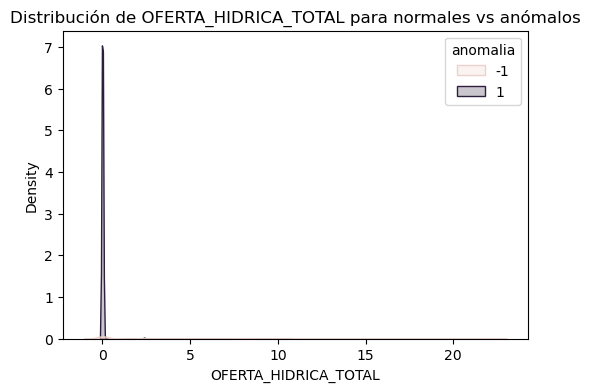

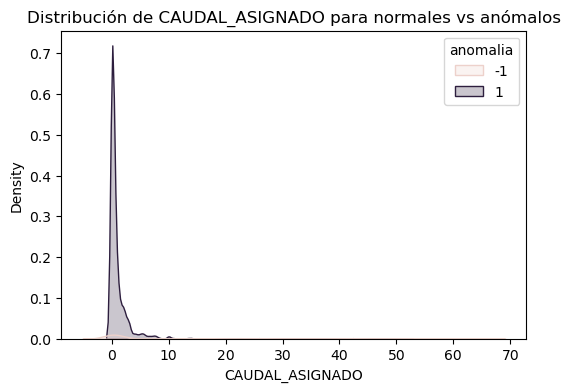

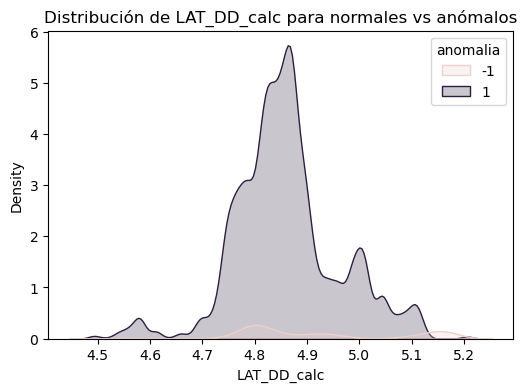

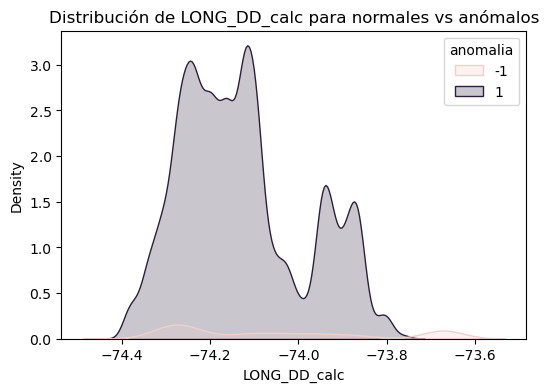

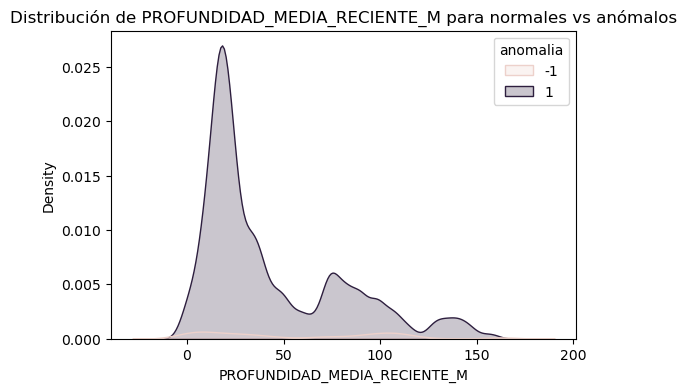

In [55]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data_vis, x=col, hue="anomalia", fill=True)
    plt.title(f"Distribución de {col} para normales vs anómalos")
    plt.show()


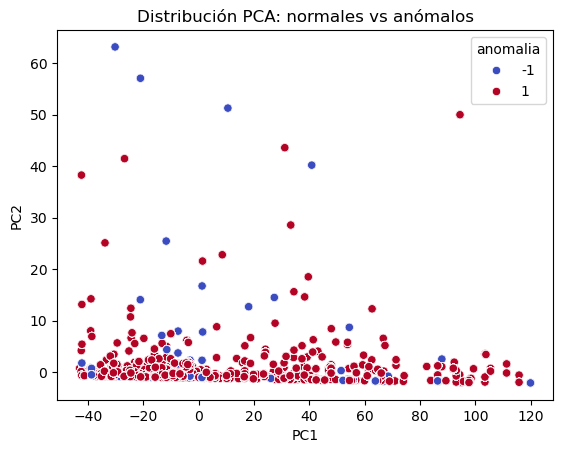

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Imputar NaN con la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(data_vis[num_cols])

# Aplicar PCA sobre datos sin NaN
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_imputed)

data_vis["PC1"], data_vis["PC2"] = X_pca[:,0], X_pca[:,1]

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data_vis, x="PC1", y="PC2", hue="anomalia", palette="coolwarm")
plt.title("Distribución PCA: normales vs anómalos")
plt.show()


In [57]:
modeloIF.named_steps.keys()


dict_keys(['pre', 'iso'])

In [58]:
modeloIF.named_steps['iso']

IsolationForest(contamination=0.05, n_estimators=200, n_jobs=-1,
                random_state=42)

In [59]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [60]:
# Suponiendo que tienes las listas
all_features = num_cols + cat_cols

# Calcular el score de anomalía
data_vis["score_anomalia"] = modeloIF.decision_function(data_vis[all_features])


In [61]:
corr = data_vis[all_features + ["score_anomalia"]].corr(numeric_only=True)["score_anomalia"].sort_values()
corr


PROFUNDIDAD_MEDIA_RECIENTE_M   -0.207336
CAUDAL_ASIGNADO                -0.172486
OFERTA_HIDRICA_TOTAL           -0.113574
LONG_DD_calc                   -0.069396
LAT_DD_calc                    -0.047741
score_anomalia                  1.000000
Name: score_anomalia, dtype: float64

In [62]:
preprocessor = modeloIF.named_steps['pre']
iso_model = modeloIF.named_steps['iso']


In [63]:
all_features = num_cols + cat_cols
X_pre = preprocessor.transform(data_vis[all_features])


In [64]:
# Obtener nombres de columnas transformadas
encoded_cat_cols = list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
)
feature_names = num_cols + encoded_cat_cols


In [65]:
import shap
explainer = shap.TreeExplainer(iso_model)
shap_values = explainer.shap_values(X_pre, check_additivity=False)

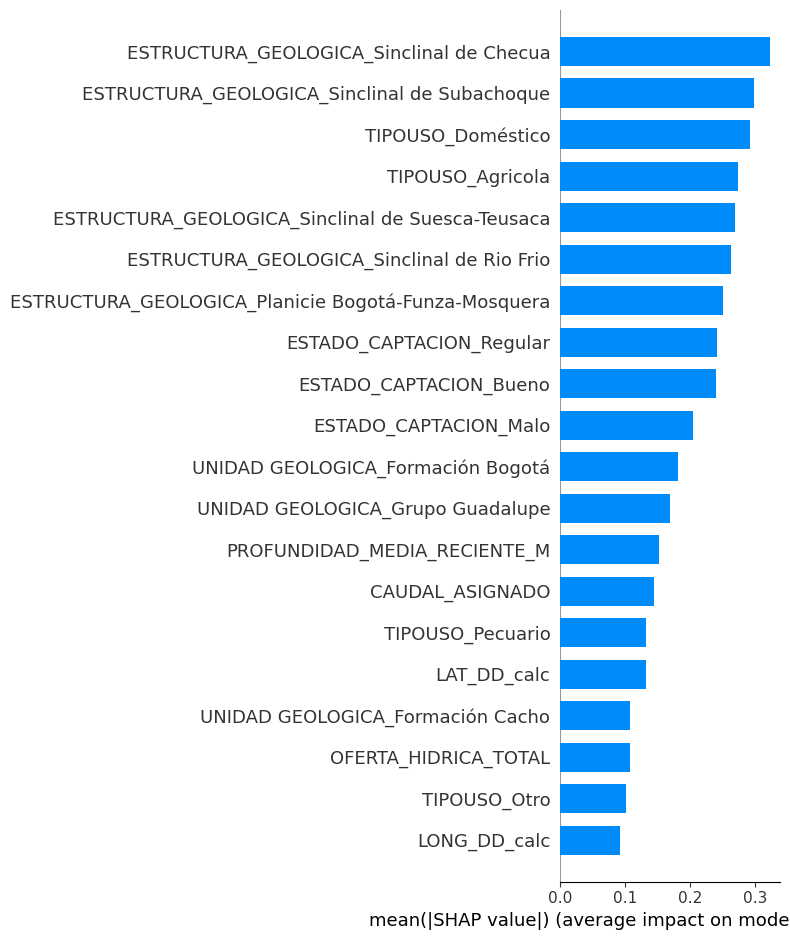

In [66]:
shap.summary_plot(shap_values, features=X_pre, feature_names=feature_names, plot_type="bar")


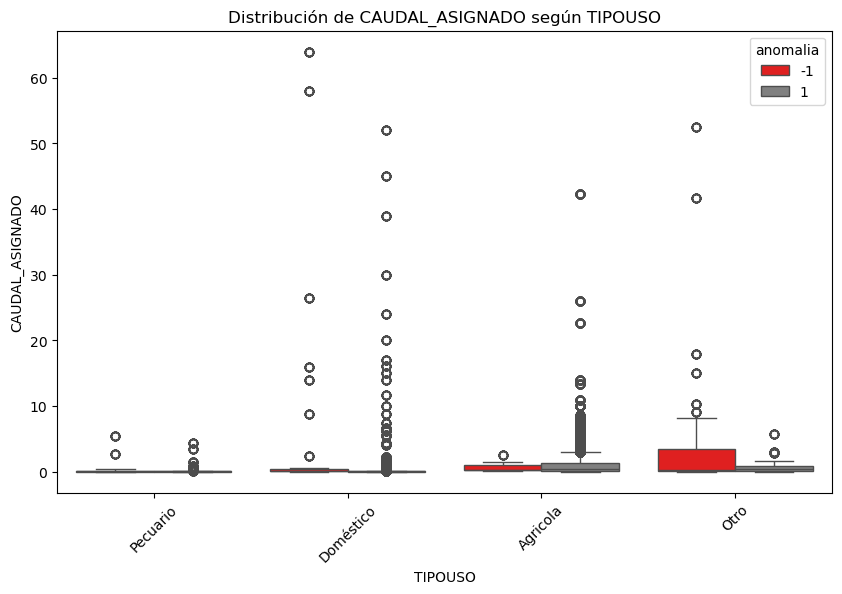

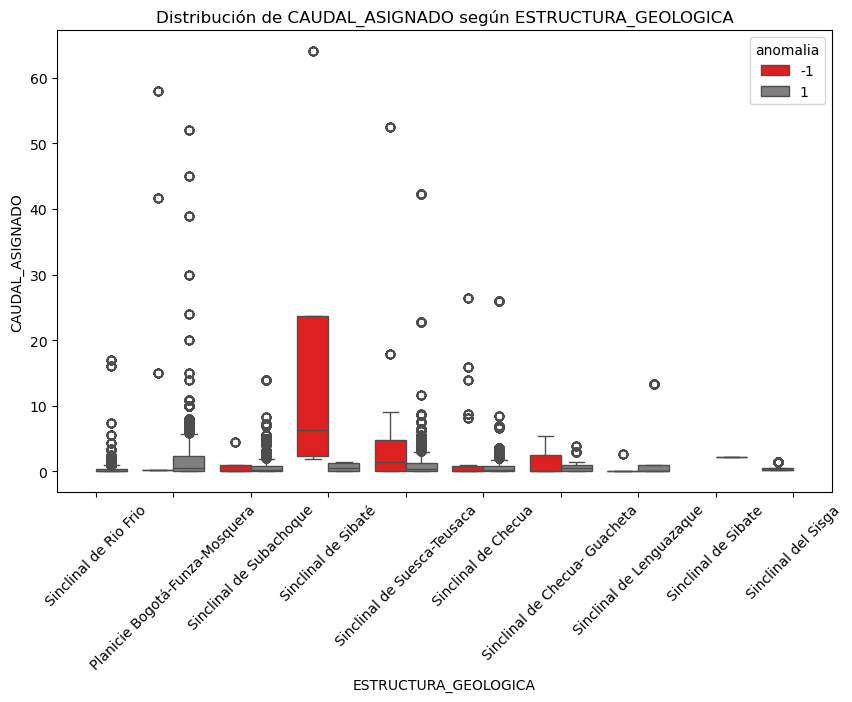

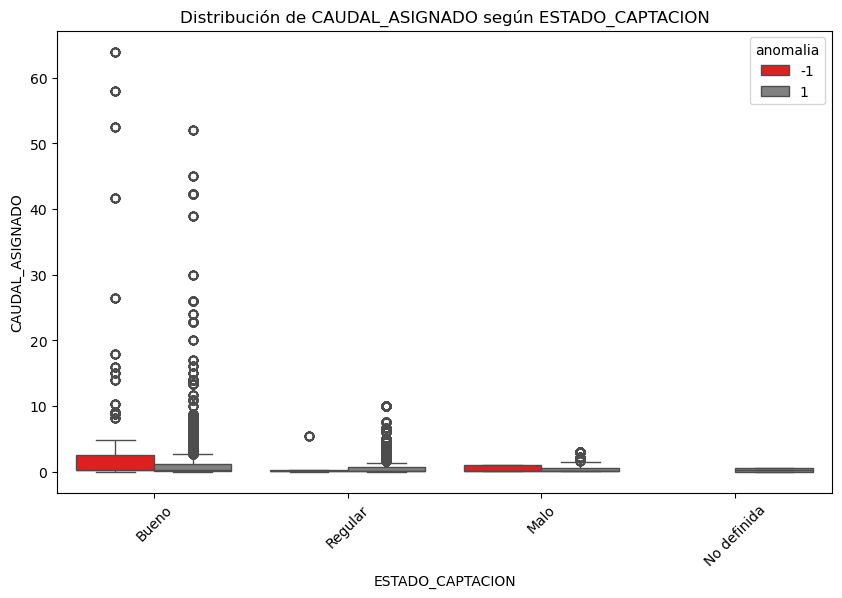

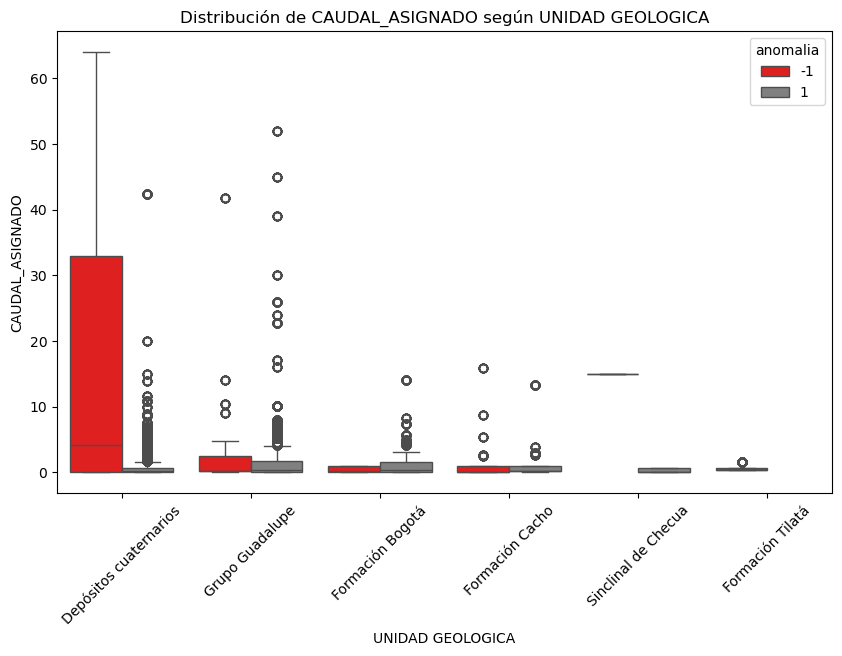

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ["TIPOUSO", "ESTRUCTURA_GEOLOGICA", "ESTADO_CAPTACION","UNIDAD GEOLOGICA"]

for cat in cat_vars:
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=data_vis,
        x=cat,
        y="CAUDAL_ASIGNADO",
        hue="anomalia",
        palette={1:"gray", -1:"red"}
    )
    plt.title(f"Distribución de CAUDAL_ASIGNADO según {cat}")
    plt.xticks(rotation=45)
    plt.show()


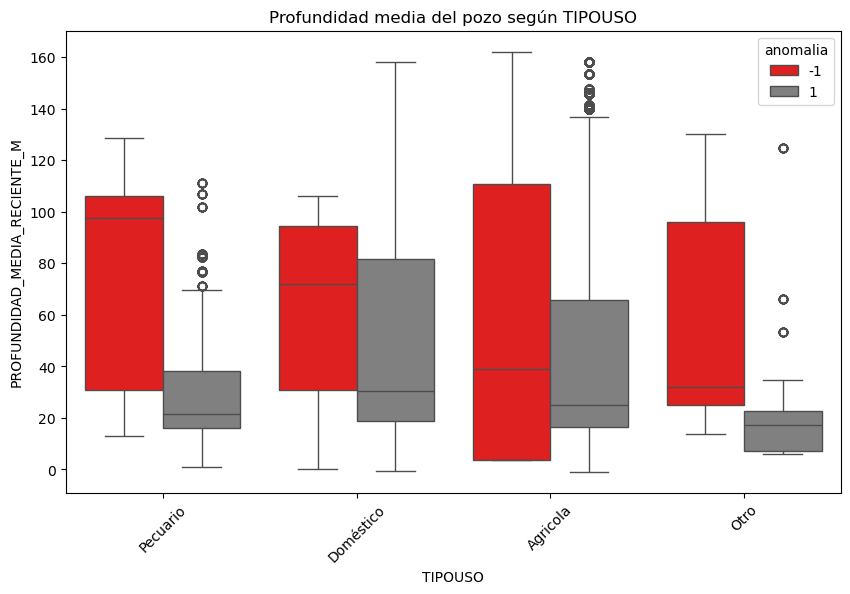

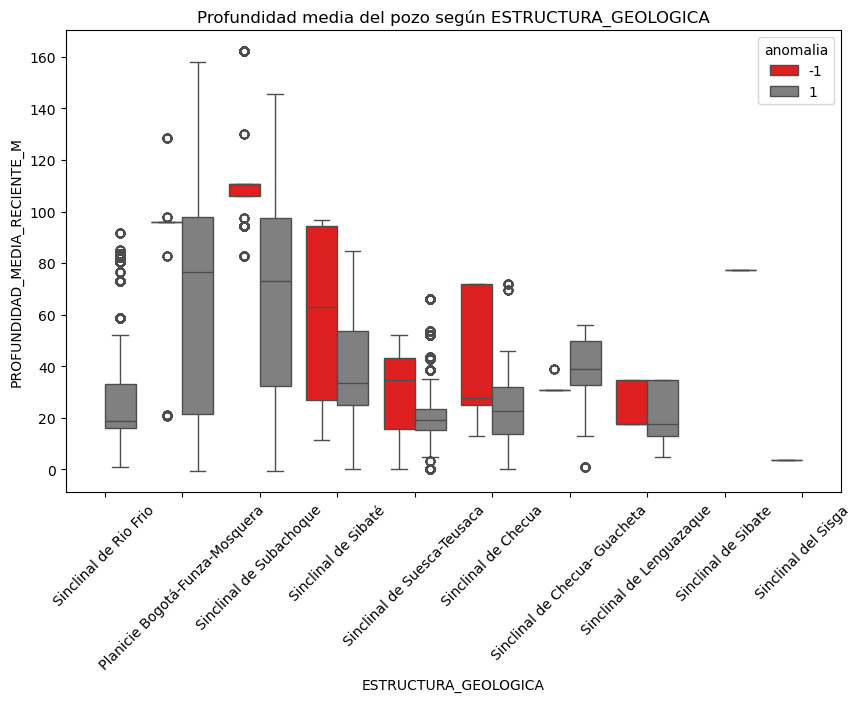

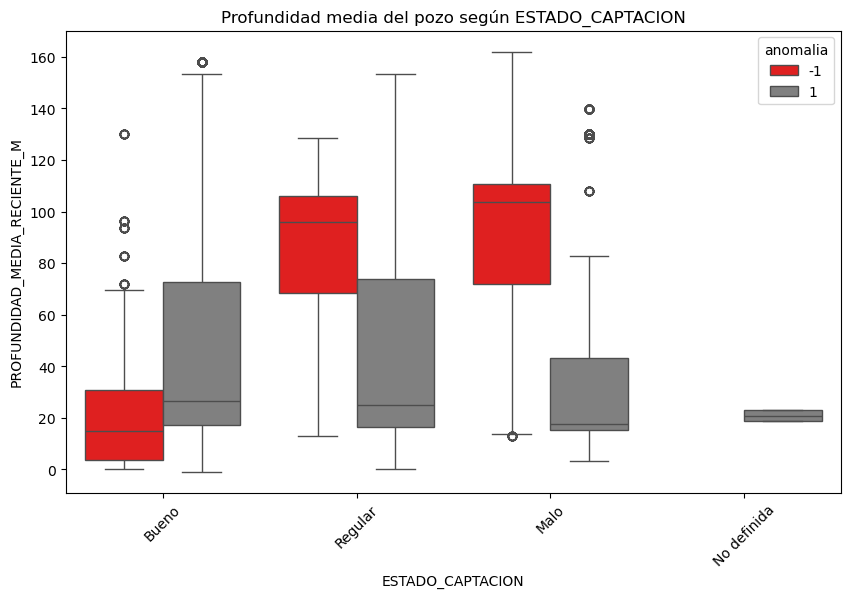

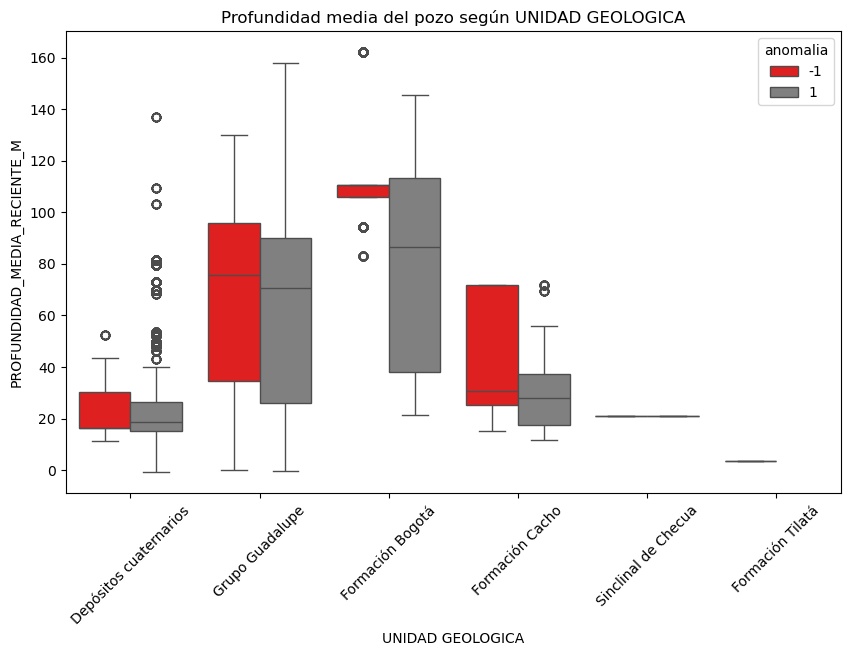

In [68]:

cat_vars = ["TIPOUSO", "ESTRUCTURA_GEOLOGICA", "ESTADO_CAPTACION","UNIDAD GEOLOGICA"]

for cat in cat_vars:
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=data_vis,
        x=cat,
        y="PROFUNDIDAD_MEDIA_RECIENTE_M",
        hue="anomalia",
        palette={1:"gray", -1:"red"}
    )
    plt.title(f"Profundidad media del pozo según {cat}")
    plt.xticks(rotation=45)
    plt.show()

In [69]:
resultados

,IDCAPTACION,anomalia,score
0,7027901,1,0.050146
1,7027901,1,0.050146
2,7027901,1,0.050146
3,7027901,1,0.050146
4,7027901,1,0.050146
...,...,...,...
67046,7038131,1,0.001256
67047,7038131,1,0.001256
67048,7038131,1,0.001256
67049,7038131,1,0.001256
